### Colab Activity 21.4: Using a Neural Net for Non-Concentric Data

**Expected Time = 60 minutes** 



This activity focuses on using a neural network to classify a dataset that does not have an obvious linear boundary.  An important idea about the neural net is its ability to solve such problems with high accuracy.  The dataset you will use is created using Scikit-Learn, and is meant to mimic that from the videos.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings

from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


warnings.filterwarnings('ignore')

2024-08-27 15:12:21.755681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-27 15:12:21.755762: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### The Data

Below, a dataset is manufactured to have four centers, and these are then combined to form a binary classification problem.  The data is created and visualized below using the `make_blobs` function.

In [2]:
X, y = make_blobs([50, 50, 50, 50], centers = [[0, 5], [5, 0], [5, 5], [0, 0]],
                 random_state=42)

In [3]:
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

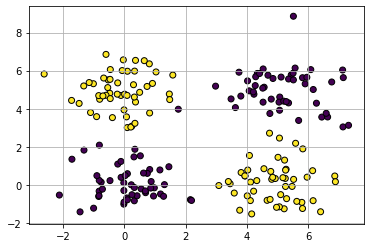

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'black')
plt.grid();

[Back to top](#-Index)

### Problem 1

#### The Network Architecture



First, use `keras` to create a `Sequential` model named `model` with a fully connected layer with 100 neurons and a `relu` activation function. The output layer of this model should have one neuron and a `sigmoid` activation function.

Next, compile this model with the `bce` loss and with `metrics` equal to `acc`.

Finally, use the `fit()` method on `model` for training using the `X` and `y` data. For this step, use 100 epochs, set `verbose=0` to disables the output of training progress, and use `validation_split=0.2` to ansure 20% of the data is used for validation. Assign the trained model to the `history` variable below.

In [ ]:

model = Sequential([Dense(100, activation = 'relu'), 
                   Dense(1, activation = 'sigmoid')])
model.compile(loss = 'bce', metrics = ['acc'])
history = model.fit(X, y, epochs = 100, verbose = 0, validation_split = 0.2)


### ANSWER CHECK
print(history.history['acc'][-1])

2024-08-27 15:19:32.715340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-27 15:19:32.715407: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-27 15:19:32.715447: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (visiblemonarch-marvinmulti): /proc/driver/nvidia/version does not exist
2024-08-27 15:19:32.718749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.9750000238418579


[Back to top](#-Index)

### Problem 2

#### How many epochs are necessary



An important consideration is not wasting energy in over training your data.  Create a visualization of the loss function. Can you identify a point of diminishing returns?   

Assign your answer as an integer for what you believe is an optimal number of training  `epochs`. 

In [ ]:
# create a visualization for the loss function


print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

epochs = 20


### ANSWER CHECK
print(epochs)

20
